In [ ]:
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from sympy.solvers import solve
from sympy import Symbol

# Ejercicio 2

In [ ]:
rango = 10000
eje_x = np.linspace(-10, 10, rango)
dens_norm = sp.stats.norm.pdf(eje_x)
holder = np.zeros(rango)
sumas = 2
for i in range(0, rango):
  for j in range(0,sumas):
    holder[i]+= np.random.standard_cauchy()
  


Text(0.5, 1.0, 'Densidad de la suma de dos observaciones provenientes de distribuciones CL')

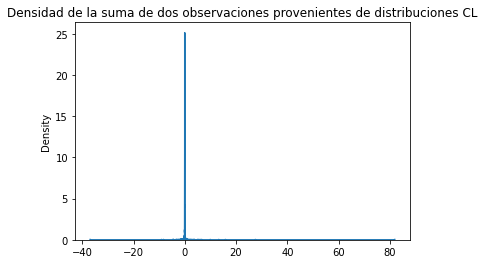

In [ ]:
histograma = sns.histplot(data = (holder - np.mean(holder))/np.std(holder), stat = 'density', element = 'step', fill = False, kde = False)
histograma.set_title('Densidad de la suma de dos observaciones provenientes de distribuciones CL')

Text(0.5, 1.0, 'Densidad de la suma de dos observaciones provenientes de distribuciones CL (sin val extremos)')

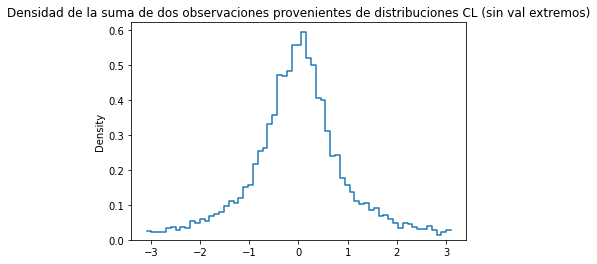

In [ ]:
holder =  holder[holder  <= 10]
holder = holder[-10<=holder]
histograma = sns.histplot(data = (holder - np.mean(holder))/np.std(holder), stat = 'density', element = 'step', fill = False, kde = False)

histograma.set_title('Densidad de la suma de dos observaciones provenientes de distribuciones CL (sin val extremos)')


In [ ]:
rango = 10000
eje_x = np.linspace(-5, 5, rango)
holder = np.zeros(rango)
sumas = 10
for i in range(0, rango):
  for j in range(0,sumas):
    holder[i]+= np.random.standard_cauchy()
  
holder =  holder[holder  <= 150]
holder = holder[-150<=holder]

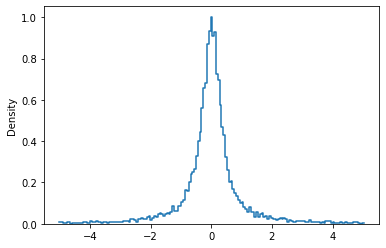

In [ ]:
histograma = sns.histplot(data = (holder - np.mean(holder))/np.std(holder), stat = 'density', element = 'step', fill = False, kde = False)


In [ ]:
rango = 10000
eje_x = np.linspace(-5, 5, rango)
holder = np.zeros(rango)
sumas = 50
for i in range(0, rango):
  for j in range(0,sumas):
    holder[i]+= np.random.standard_cauchy()
  
holder =  holder[holder  <= 250]
holder = holder[-250<=holder]

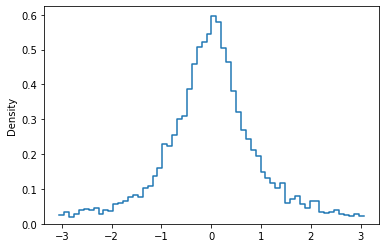

In [ ]:
histograma = sns.histplot(data = (holder - np.mean(holder))/np.std(holder), stat = 'density', element = 'step', fill = False, kde = False)


In [ ]:
rango = 10000
eje_x = np.linspace(-5, 5, rango)
holder = np.zeros(rango)
sumas = 100
for i in range(0, rango):
  for j in range(0,sumas):
    holder[i]+= np.random.standard_cauchy()
  
holder =  holder[holder  <= 400]
holder = holder[-400<=holder]

Text(0.5, 1.0, 'Densidad de la suma de 100 observaciones provenientes de distribuciones CL')

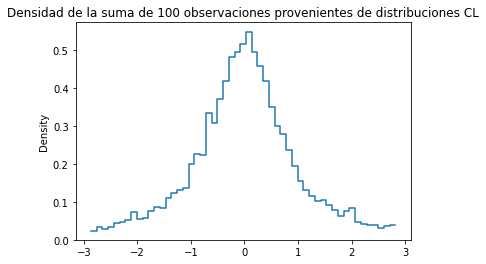

In [ ]:
histograma = sns.histplot(data = (holder - np.mean(holder))/np.std(holder), stat = 'density', element = 'step', fill = False, kde = False)

histograma.set_title('Densidad de la suma de 100 observaciones provenientes de distribuciones CL')

# Ejercicio 4

In [ ]:
T = 200
N = 100
c = N / T
# cambiar este parámetro r para obtener la gráfica deseada
r = 0.8
p = r
alpha = (1-c)/c


In [ ]:
n_iter = 1000
E = []
for i in range(0,n_iter):
  M = np.random.randn(N, N)
  M = (M+M.T)/2
  H = np.random.randn(N,T)
  W = np.matmul(H,H.T)
  H = p*M / np.sqrt(N) + (1-p)*W / T
  eigenvals = np.linalg.eigvals(H)
  E.append(eigenvals)
E = np.array(E).flatten()

In [ ]:
vals_z = np.linspace(-1, max(E), 100)
holder = np.zeros(100)
G = Symbol('G')
for i in range(0,100):
  res = solve(p**2 * G / 2 + (1- p)/(1 - c*(1-p)*G) + 1/G - vals_z[i], G)
  if np.round(np.abs(np.imag(complex(res[0])))) == 0:
    holder[i] = np.abs(np.imag(complex(res[1]))) / np.pi
  else:
    holder[i] = np.abs(np.imag(complex(res[0]))) / np.pi

In [ ]:
lam_min = (1-np.sqrt(c))**2
lam_max = (1+np.sqrt(c))**2
indices = np.linspace(-2,4,10000)
marcenko = (np.sqrt((lam_max- indices)*(indices - lam_min)))/(2*np.pi * c* indices)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [ ]:
x_semi = np.linspace(-1.5,1.5,10000)
def semicirculo(x):
  return np.sqrt(2 - x**2)/np.pi
y_semi = semicirculo(x_semi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


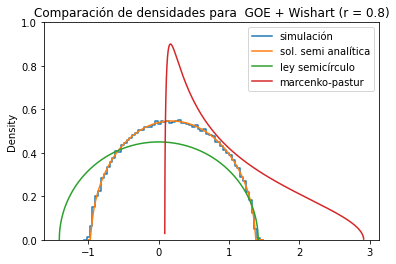

In [ ]:
histp= sns.histplot(data = np.real(E.flatten()),stat = 'density',element = 'step', fill = False, kde = False, label ="simulación")
histp.set(ylim=(0,1))
plt.plot(vals_z, holder, label=f'sol. semi analítica')
#plt.plot(x_pastur, y_pastur, label = f'marcenko-pastur')
plt.plot(x_semi, y_semi, label = f'ley semicírculo')
plt.plot(indices, marcenko, label = f'marcenko-pastur')
histp.set_title('Comparación de densidades para  GOE + Wishart (r = 0.8)')
plt.legend()

# Ejercicio 5

In [ ]:
c = 1/2
lam_min = (1-np.sqrt(c))**2
lam_max = (1+np.sqrt(c))**2
indices = np.linspace(-1,4,90000)
marcenko = (np.sqrt((lam_max- indices)*(indices - lam_min)))/(2*np.pi * c* indices)
x_min = 2*c + 1 - np.sqrt(2*(c +1))
x_max = 2*c + 1 + np.sqrt(2*(c +1))
inv_marcenko = (np.sqrt((x_max - indices)*(indices - x_min)))/(2* np.pi * c * indices**2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


(0.0, 1.5)

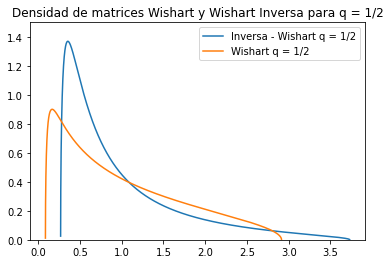

In [ ]:
plt.plot(indices, inv_marcenko, label = f"Inversa - Wishart q = 1/2")
plt.plot(indices, marcenko, label = f"Wishart q = 1/2")
plt.title('Densidad de matrices Wishart y Wishart Inversa para q = 1/2')
plt.legend()
plt.ylim(0,1.5)

# Ejercicio 6

In [ ]:
T = Symbol("T")
q = 0.01
b = 25
vals_z = np.linspace(0.1,3,100)
holder = np.zeros(100)
for i in range(0,100):
  sol = solve( q**2 *T**4 + 2 * q*(q-b*vals_z[i])* T**3+(vals_z[i]**2 - 2*b*q*vals_z[i]+q**2-1)*T**2-2*T-1 , T)
  temp = np.zeros(4)
  for j in range(0,4):
    temp[j] = (np.imag(complex(sol[j])))
  holder[i] = np.max(temp)


In [ ]:
q_01 = holder * (1/(np.pi * vals_z))

In [ ]:
T = Symbol("T")
q = 0.17
b = 1.5
vals_z = np.linspace(0.1,3,100)
holder = np.zeros(100)
for i in range(0,100):
  sol = solve( q**2 *T**4 + 2 * q*(q-b*vals_z[i])* T**3+(vals_z[i]**2 - 2*b*q*vals_z[i]+q**2-1)*T**2-2*T-1 , T)
  temp = np.zeros(4)
  for j in range(0,4):
    temp[j] = (np.imag(complex(sol[j])))
  holder[i] = np.max(temp)


In [ ]:
q_017 = holder * (1/(np.pi * vals_z))

In [ ]:
T = Symbol("T")
q = 0.25
b = 1
vals_z = np.linspace(0.1,3,100)
holder = np.zeros(100)
for i in range(0,100):
  sol = solve( q**2 *T**4 + 2 * q*(q-b*vals_z[i])* T**3+(vals_z[i]**2 - 2*b*q*vals_z[i]+q**2-1)*T**2-2*T-1 , T)
  temp = np.zeros(4)
  for j in range(0,4):
    temp[j] = (np.imag(complex(sol[j])))
  holder[i] = np.max(temp)


In [ ]:
q_025 = holder * (1/(np.pi * vals_z))

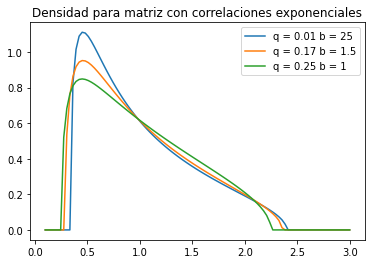

In [ ]:
plt.title('Densidad para matriz con correlaciones exponenciales')

plt.plot(vals_z, q_01,label = f"q = 0.01 b = 25")
plt.plot(vals_z, q_017, label = f"q = 0.17 b = 1.5")
plt.plot(vals_z, q_025, label = f"q = 0.25 b = 1")
plt.legend()